# <b>iPhone_Analysis_Mini_Project</b>

### <b>Objective:</b>

##### This project aimed to gain a deeper understanding of the pricing strategies of various iPhone models across different RAM configurations, allowing businesses or individuals to make data-driven decisions when evaluating iPhone options in the market.

#### <b>Project Highlights:</b>

- **Data Enrichment:**
    - Created new derived columns (e.g., Discounted_Price) to enhance the analysis and provide more actionable insights.
- **Comprehensive Analysis:**
    - Analyzed the correlation between iPhone models, RAM sizes, and various pricing and rating metrics.
- **Data Storytelling:**
    - Used data visualization to tell a clear and engaging story about iPhone models, pricing strategies, and their features.
- **Real-World Application:**
    - This project mimics real-world data science tasks such as data wrangling, exploratory analysis, and creating insights from product datasets.
 
This project enhanced my **data wrangling**, **data analysis**, and **data visualization** skills, providing valuable insights into the iPhone product data.

In [1]:
# Installing Libraries

# !pip install pandas -q

## <b> Importing Libraries </b>

In [5]:
import pandas as pd
import sys
from tqdm import tqdm  # Using tqdm for checking progress status of iterating operation
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings

# Command use to ignore warnings
warnings.filterwarnings("ignore")  

# Enable tqdm for pandas
tqdm.pandas()

In [24]:
# Reading Apple_product csv file from github

iphone_data = pd.read_csv(f'https://raw.githubusercontent.com/vishwajeet-kamble/Python_Projects_and_Practices/refs/heads/main/iPhone_Analysis_Mini_Project/apple_products.csv')

display(iphone_data.head())

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


#### <b>Checnking Dimensions of DataFrame</b>

In [26]:
# Checnking Dimensions of DataFrame
print(f'Dimensions of DataFrame: {iphone_data.shape} \n')

print(f'Dimensions of the object is {iphone_data.shape} \n Rows = {iphone_data.shape[0]} \n Columns = {iphone_data.shape[1]} \n')

print(f'Columns in DataFrame: \n {iphone_data.columns}')

Dimensions of DataFrame: (62, 11) 

Dimensions of the object is (62, 11) 
 Rows = 62 
 Columns = 11 

Columns in DataFrame: 
 Index(['Product Name', 'Product URL', 'Brand', 'Sale Price', 'Mrp',
       'Discount Percentage', 'Number Of Ratings', 'Number Of Reviews', 'Upc',
       'Star Rating', 'Ram'],
      dtype='object')


#### <b>Finding out duplicate Cols in Dataframe</b>

In [54]:
#Finding out duplicate Cols in Dataframe

df_columns = iphone_data.columns
num_columns = len(df_columns)
print(f"Number of Columns: {num_columns}")

unique_columns = iphone_data.columns.unique()
unique_num_columns = len(unique_columns)
print(f"Number of Unique Columns: {unique_num_columns}")

## checking all elementes match
print(df_columns == unique_columns)

are_columns_unique = num_columns == unique_num_columns and all(df_columns == unique_columns)

# Print the result
if are_columns_unique:
    print("All column names are unique.")
else:
    print("There are duplicate column names.")


Number of Columns: 11
Number of Unique Columns: 11
[ True  True  True  True  True  True  True  True  True  True  True]
All column names are unique.


#### <b>Replace spaces with underscores in column names </b>

In [56]:
#List Comprehension:

# Replace spaces with underscores in column names
iphone_data_col = [col.replace(" ", "_") for col in iphone_data.columns]

# Display the updated column names
print(iphone_data_col)


Index(['Product Name', 'Product URL', 'Brand', 'Sale Price', 'Mrp',
       'Discount Percentage', 'Number Of Ratings', 'Number Of Reviews', 'Upc',
       'Star Rating', 'Ram'],
      dtype='object')


### OR

In [60]:
## Lambda and Map function

# Map function is used to iterate or iterator
iphone_data_new_col = iphone_data.columns.map(lambda r : r.replace(" ", "_"))

print(iphone_data_new_col)

Index(['Product_Name', 'Product_URL', 'Brand', 'Sale_Price', 'Mrp',
       'Discount_Percentage', 'Number_Of_Ratings', 'Number_Of_Reviews', 'Upc',
       'Star_Rating', 'Ram'],
      dtype='object')


In [62]:
# Replacing Column name with New Column name

iphone_data.columns = iphone_data_new_col

print(iphone_data.columns)

Index(['Product_Name', 'Product_URL', 'Brand', 'Sale_Price', 'Mrp',
       'Discount_Percentage', 'Number_Of_Ratings', 'Number_Of_Reviews', 'Upc',
       'Star_Rating', 'Ram'],
      dtype='object')


### <b> Exporting updated Dataset to Local </b>

In [73]:
## Exporting Data to Local file in csv

iphone_data.to_csv(f'C:\\Users\\VishwajeetKamble\\Python_Practice\\Darshil_Parmar\\Projects\\apple_products_data.csv', index=None)

In [75]:
# Copying data to new variable for analysis

iphone_dataset = iphone_data.copy()

display(iphone_dataset.head(5))

# print(iphone_dataset.shape)

print(f'Shape of csv file is {iphone_dataset.shape} \n Rows = {iphone_dataset.shape[0]} \n Columns = {iphone_dataset.shape[1]}')

,Product_Name,Product_URL,Brand,Sale_Price,Mrp,Discount_Percentage,Number_Of_Ratings,Number_Of_Reviews,Upc,Star_Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


Shape of csv file is (62, 11) 
 Rows = 62 
 Columns = 11


In [77]:
# Columns in Dataset

display(iphone_dataset.columns)

print()

# Desplaying information of Dataset
display(iphone_dataset.info())

Index(['Product_Name', 'Product_URL', 'Brand', 'Sale_Price', 'Mrp',
       'Discount_Percentage', 'Number_Of_Ratings', 'Number_Of_Reviews', 'Upc',
       'Star_Rating', 'Ram'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Name         62 non-null     object 
 1   Product_URL          62 non-null     object 
 2   Brand                62 non-null     object 
 3   Sale_Price           62 non-null     int64  
 4   Mrp                  62 non-null     int64  
 5   Discount_Percentage  62 non-null     int64  
 6   Number_Of_Ratings    62 non-null     int64  
 7   Number_Of_Reviews    62 non-null     int64  
 8   Upc                  62 non-null     object 
 9   Star_Rating          62 non-null     float64
 10  Ram                  62 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB


None

In [79]:
# Checking unique Discount_percentage offered

iphone_dataset['Discount_Percentage'].unique()

array([ 0, 20, 16, 29, 15, 17, 18,  6, 13, 14, 10,  7, 11,  8, 24, 22],
      dtype=int64)

##### Filtering data as per need

In [14]:
# Filtering Data to find data where Discount is 10%

print( f"Total rows where Discount_Percentage is 10% >> {iphone_dataset[iphone_dataset['Discount_Percentage'] == 10].shape[0]}" )

display( iphone_dataset[iphone_dataset['Discount_Percentage'] == 10] ) 

Total rows where Discount_Percentage is 10% >> 5


,Product_Name,Product_URL,Brand,Sale_Price,Mrp,Discount_Percentage,Number_Of_Ratings,Number_Of_Reviews,Upc,Star_Rating,Ram
29,"APPLE iPhone 12 (White, 128 GB)",https://www.flipkart.com/apple-iphone-12-white...,Apple,75900,84900,10,2101,180,MOBFWBYZBTZFGJF9,4.6,6 GB
35,"APPLE iPhone 12 (Black, 128 GB)",https://www.flipkart.com/apple-iphone-12-black...,Apple,75900,84900,10,2101,180,MOBFWBYZK3HACR72,4.6,6 GB
36,"APPLE iPhone 12 (Blue, 128 GB)",https://www.flipkart.com/apple-iphone-12-blue-...,Apple,75900,84900,10,2101,180,MOBFWBYZKPTZF9VG,4.6,6 GB
40,"APPLE iPhone 12 (Green, 128 GB)",https://www.flipkart.com/apple-iphone-12-green...,Apple,75900,84900,10,2092,178,MOBFWBYZQXUEHF48,4.6,6 GB
44,"APPLE iPhone 12 (Red, 128 GB)",https://www.flipkart.com/apple-iphone-12-red-1...,Apple,75900,84900,10,2101,180,MOBFWBYZUHPFWQRD,4.6,6 GB


#### <b> Adding derived/logical columns to enhance anlysis

In [85]:
# Use tqdm to display a progress bar and measure time
start_time = time.time()  # Start time for tracking execution time

# Adding new column as "Discounted_Price" using "Sales_Price" * ( 1 - ("Discount_Percentage"/100) )
iphone_dataset['Discounted_Price'] = iphone_dataset.progress_apply(lambda row: int( row['Sale_Price'] * ( 1 - ( row['Discount_Percentage'] / 100 ) ) ), axis=1 )

# Adding new column as "Discounted_Amount" using "Sales_Price" * "Discount_Percentage"
iphone_dataset['Discounted_Amount'] = iphone_dataset.progress_apply(lambda row: int( row['Sale_Price'] * ( row['Discount_Percentage'] / 100 ) ), axis=1 )


# Creating Column Model of apple product by extracting text before "("
# iphone_dataset['Product Name'].str.split('(', expand=True)[0]
iphone_dataset['Model'] = iphone_dataset['Product_Name'].str.split('(', expand=True)[0].str.strip()

# Extracting Platform from Product URL 
iphone_dataset['Platform'] = iphone_dataset['Product_URL'].str.split(".", expand=True)[1].str.title()


end_time = time.time()  # End time after processing

# Calculate and display the total processing time
execution_time = end_time - start_time
print(f"Processing time: {execution_time:.4f} seconds")

# Display the DataFrame
display(iphone_dataset.head(5))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<?, ?it/s]

Processing time: 0.0631 seconds


,Product_Name,Product_URL,Brand,Sale_Price,Mrp,Discount_Percentage,Number_Of_Ratings,Number_Of_Reviews,Upc,Star_Rating,Ram,Discounted_Price,Discounted_Amount,Model,Platform
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB,49900,0,APPLE iPhone 8 Plus,Flipkart
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB,84900,0,APPLE iPhone 8 Plus,Flipkart
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB,84900,0,APPLE iPhone 8 Plus,Flipkart
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB,77000,0,APPLE iPhone 8,Flipkart
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB,77000,0,APPLE iPhone 8,Flipkart


In [89]:
# Checking unique values in each column and documenting it in csv:

iphone_dataset_unique_fieldcount = iphone_dataset.nunique()
display(iphone_dataset_unique_fieldcount)

with open('iphone_dataset_unique_fieldcount.csv', 'w') as f:
    f.write("Column Name,Unique Value Count\n")  # Writing the header row
    for column, count in iphone_dataset_unique_fieldcount.items():
        f.write(f"{column},{count}\n")  # Writing each row

print("Unique value counts have been written to 'iphone_dataset_unique_fieldcount.csv'")


Product_Name           62
Product_URL            62
Brand                   1
Sale_Price             24
Mrp                    22
Discount_Percentage    16
Number_Of_Ratings      19
Number_Of_Reviews      18
Upc                    62
Star_Rating             3
Ram                     4
Discounted_Price       23
Discounted_Amount      19
Model                  13
Platform                1
dtype: int64

Unique value counts have been written to 'iphone_dataset_unique_fieldcount.csv'


In [87]:
## Summary Statistics >> quick overview of the dataset's numerical columns

iphone_dataset.describe().astype(int)

,Sale_Price,Mrp,Discount_Percentage,Number_Of_Ratings,Number_Of_Reviews,Star_Rating,Discounted_Price,Discounted_Amount
count,62,62,62,62,62,62,62,62
mean,80073,88058,9,22420,1861,4,73568,6505
std,34310,34728,7,33768,2855,0,34531,4566
min,29999,39900,0,542,42,4,22799,0
25%,49900,54900,6,740,64,4,49900,4399
50%,75900,79900,10,2101,180,4,68310,7590
75%,117100,120950,14,43470,3331,4,111018,8314
max,140900,149900,29,95909,8161,4,132446,21749


In [91]:
# Average or Mean of "Sale Price"

total_sales_price = iphone_dataset['Sale_Price'].sum()
total_rows = iphone_dataset['Sale_Price'].count() 


Mean_Sales_Price = int( total_sales_price / total_rows )
print(f'Average to "Sale Price" > {Mean_Sales_Price}')

Average to "Sale Price" > 80073


#### <b>  Number of record as per Model, RAM </b>

In [96]:
# Checking Unique Model

Unique_Model = sorted(iphone_dataset['Model'].unique())
print(Unique_Model)

print('\n OR \n')

display(iphone_dataset['Model'].sort_values().unique())

['APPLE iPhone 11', 'APPLE iPhone 11 Pro', 'APPLE iPhone 11 Pro Max', 'APPLE iPhone 12', 'APPLE iPhone 12 Mini', 'APPLE iPhone 12 Pro', 'APPLE iPhone 12 Pro Max', 'APPLE iPhone 8', 'APPLE iPhone 8 Plus', 'APPLE iPhone SE', 'APPLE iPhone XS Max', 'Apple iPhone SE', 'Apple iPhone XR']

 OR 



array(['APPLE iPhone 11', 'APPLE iPhone 11 Pro',
       'APPLE iPhone 11 Pro Max', 'APPLE iPhone 12',
       'APPLE iPhone 12 Mini', 'APPLE iPhone 12 Pro',
       'APPLE iPhone 12 Pro Max', 'APPLE iPhone 8', 'APPLE iPhone 8 Plus',
       'APPLE iPhone SE', 'APPLE iPhone XS Max', 'Apple iPhone SE',
       'Apple iPhone XR'], dtype=object)

In [94]:
## Number of record as per Model, RAM

print(iphone_dataset.groupby(['Model','Ram']).size())

Model                    Ram 
APPLE iPhone 11          4 GB    7
APPLE iPhone 11 Pro      4 GB    4
APPLE iPhone 11 Pro Max  4 GB    5
APPLE iPhone 12          6 GB    7
APPLE iPhone 12 Mini     4 GB    5
                         6 GB    1
APPLE iPhone 12 Pro      4 GB    2
                         6 GB    3
APPLE iPhone 12 Pro Max  6 GB    8
APPLE iPhone 8           2 GB    3
APPLE iPhone 8 Plus      2 GB    5
APPLE iPhone SE          2 GB    4
                         4 GB    1
APPLE iPhone XS Max      4 GB    1
Apple iPhone SE          2 GB    1
Apple iPhone XR          3 GB    1
                         4 GB    4
dtype: int64


### <b>Relationship between Model, Ram, and aggregated metrics</b>

In [121]:
## Finding Relationship for field and measures

model_stats = iphone_dataset.groupby(['Model','Ram']).agg(
    count=('Model', 'size'),  # Count the number of records per model
    avg_price=('Sale_Price', lambda x: int( round( x.mean() , 0 ) ) ),  # Calculate the average price per model and rounding it
    avg_mrp=('Mrp', lambda x: int( round( x.mean() , 0 ) ) ),
    avg_number_of_ratings=('Number_Of_Ratings', lambda x: int( round( x.mean() , 0 ) ) ),
    avg_discount_percentage=('Discount_Percentage', 'mean'),
    avg_star_rating=('Star_Rating', 'mean'),
    min_star_rating=('Star_Rating', 'min'),
    max_star_rating=('Star_Rating', 'max'),
    min_price=('Sale_Price', 'min'),
    max_price=('Sale_Price', 'max'),
    min_mrp=('Mrp', 'min'),
    max_mrp=('Mrp', 'max'),
    min_discount_percentage=('Discount_Percentage', 'min'),
    max_discount_percentage=('Discount_Percentage', 'max')
)

# Sort by the 'Ram' column
model_stats_sorted = model_stats.sort_values(by='avg_price')

# Display the sorted DataFrame
display(model_stats_sorted)

count  avg_price  avg_mrp  \
Model                   Ram                               
APPLE iPhone SE         4 GB      1      29999    39900   
                        2 GB      4      33749    43650   
Apple iPhone XR         4 GB      4      41499    51650   
                        3 GB      1      41999    52900   
Apple iPhone SE         2 GB      1      44999    54900   
APPLE iPhone 11         4 GB      7      50428    57043   
APPLE iPhone 12 Mini    6 GB      1      59900    69900   
                        4 GB      5      62900    72900   
APPLE iPhone 8 Plus     2 GB      5      63900    63900   
APPLE iPhone 12         6 GB      7      74471    83471   
APPLE iPhone 8          2 GB      3      77000    77000   
APPLE iPhone XS Max     4 GB      1      89900    89900   
APPLE iPhone 11 Pro     4 GB      4     102675   127125   
APPLE iPhone 12 Pro     6 GB      3     114233   123233   
APPLE iPhone 11 Pro Max 4 GB      5     123020   123020   
APPLE iPhone 12 Pro Max 6 GB      8     125900   134900   
APPLE iPhone 12 Pro     4 GB      2     140900   149900   

                              avg_number_of_ratings  avg_discount_percentage  \
Model                   Ram                                                    
APPLE iPhone SE         4 GB                  95909                24.000000   
                        2 GB                  95858                22.500000   
Apple iPhone XR         4 GB                  79530                19.000000   
                        3 GB                  79512                20.000000   
Apple iPhone SE         2 GB                  95909                18.000000   
APPLE iPhone 11         4 GB                  43538                11.428571   
APPLE iPhone 12 Mini    6 GB                    740                14.000000   
                        4 GB                    736                13.400000   
APPLE iPhone 8 Plus     2 GB                   3431                 0.000000   
APPLE iPhone 12         6 GB                   2098                10.285714   
APPLE iPhone 8          2 GB                  11202                 0.000000   
APPLE iPhone XS Max     4 GB                   1454                 0.000000   
APPLE iPhone 11 Pro     4 GB                   7086                19.000000   
APPLE iPhone 12 Pro     6 GB                    545                 6.666667   
APPLE iPhone 11 Pro Max 4 GB                   1078                 0.000000   
APPLE iPhone 12 Pro Max 6 GB                    580                 6.000000   
APPLE iPhone 12 Pro     4 GB                    544                 6.000000   

                              avg_star_rating  min_star_rating  \
Model                   Ram                                      
APPLE iPhone SE         4 GB              4.5              4.5   
                        2 GB              4.5              4.5   
Apple iPhone XR         4 GB              4.6              4.6   
                        3 GB              4.6              4.6   
Apple iPhone SE         2 GB              4.5              4.5   
APPLE iPhone 11         4 GB              4.6              4.6   
APPLE iPhone 12 Mini    6 GB              4.5              4.5   
                        4 GB              4.5              4.5   
APPLE iPhone 8 Plus     2 GB              4.6              4.6   
APPLE iPhone 12         6 GB              4.6              4.6   
APPLE iPhone 8          2 GB              4.5              4.5   
APPLE iPhone XS Max     4 GB              4.6              4.6   
APPLE iPhone 11 Pro     4 GB              4.6              4.6   
APPLE iPhone 12 Pro     6 GB              4.5              4.5   
APPLE iPhone 11 Pro Max 4 GB              4.7              4.7   
APPLE iPhone 12 Pro Max 6 GB              4.6              4.6   
APPLE iPhone 12 Pro     4 GB              4.5              4.5   

                              max_star_rating  min_price  max_price  min_mrp  \
Model                   Ram                         

In [155]:
# Create a pivot table to view the relationship between Model, Ram, and aggregated metrics
pivot_table = model_stats.reset_index().pivot_table(
    index=['Model', 'Ram'],  # Group by 'Model' and 'Ram'
    values=['count', 'avg_price', 'avg_mrp', 'min_price', 'max_price', 'min_discount_percentage', 'max_discount_percentage'], 
    aggfunc='mean'  # You can change this depending on the aggregation you want to see
)

# Display the pivot table
display(pivot_table)


avg_mrp  avg_price  count  \
Model                   Ram                                
APPLE iPhone 11         4 GB   57043.0    50428.0    7.0   
APPLE iPhone 11 Pro     4 GB  127125.0   102675.0    4.0   
APPLE iPhone 11 Pro Max 4 GB  123020.0   123020.0    5.0   
APPLE iPhone 12         6 GB   83471.0    74471.0    7.0   
APPLE iPhone 12 Mini    4 GB   72900.0    62900.0    5.0   
                        6 GB   69900.0    59900.0    1.0   
APPLE iPhone 12 Pro     4 GB  149900.0   140900.0    2.0   
                        6 GB  123233.0   114233.0    3.0   
APPLE iPhone 12 Pro Max 6 GB  134900.0   125900.0    8.0   
APPLE iPhone 8          2 GB   77000.0    77000.0    3.0   
APPLE iPhone 8 Plus     2 GB   63900.0    63900.0    5.0   
APPLE iPhone SE         2 GB   43650.0    33749.0    4.0   
                        4 GB   39900.0    29999.0    1.0   
APPLE iPhone XS Max     4 GB   89900.0    89900.0    1.0   
Apple iPhone SE         2 GB   54900.0    44999.0    1.0   
Apple iPhone XR         3 GB   52900.0    41999.0    1.0   
                        4 GB   51650.0    41499.0    4.0   

                              max_discount_percentage  max_price  \
Model                   Ram                                        
APPLE iPhone 11         4 GB                     14.0    54999.0   
APPLE iPhone 11 Pro     4 GB                     29.0   117900.0   
APPLE iPhone 11 Pro Max 4 GB                      0.0   131900.0   
APPLE iPhone 12         6 GB                     11.0    75900.0   
APPLE iPhone 12 Mini    4 GB                     14.0    64900.0   
                        6 GB                     14.0    59900.0   
APPLE iPhone 12 Pro     4 GB                      6.0   140900.0   
                        6 GB                      7.0   120900.0   
APPLE iPhone 12 Pro Max 6 GB                      6.0   130900.0   
APPLE iPhone 8          2 GB                      0.0    77000.0   
APPLE iPhone 8 Plus     2 GB                      0.0    84900.0   
APPLE iPhone SE         2 GB                     24.0    34999.0   
                        4 GB                     24.0    29999.0   
APPLE iPhone XS Max     4 GB                      0.0    89900.0   
Apple iPhone SE         2 GB                     18.0    44999.0   
Apple iPhone XR         3 GB                     20.0    41999.0   
                        4 GB                     20.0    41999.0   

                              min_discount_percentage  min_price  
Model                   Ram                                       
APPLE iPhone 11         4 GB                      8.0    46999.0  
APPLE iPhone 11 Pro     4 GB                     15.0    74999.0  
APPLE iPhone 11 Pro Max 4 GB                      0.0   117100.0  
APPLE iPhone 12         6 GB                     10.0    70900.0  
APPLE iPhone 12 Mini    4 GB                     13.0    59900.0  
                        6 GB                     14.0    59900.0  
APPLE iPhone 12 Pro     4 GB                      6.0   140900.0  
                        6 GB                      6.0   110900.0  
APPLE iPhone 12 Pro Max 6 GB                      6.0   120900.0  
APPLE iPhone 8          2 GB                      0.0    77000.0  
APPLE iPhone 8 Plus     2 GB                      0.0    49900.0  
APPLE iPhone SE         2 GB                     22.0    29999.0  
                        4 GB                     24.0    29999.0  
APPLE iPhone XS Max     4 GB                      0.0    89900.0  
Apple iPhone SE         2 GB                     18.0    44999.0  
Apple iPhone XR         3 GB                     20.0    41999.0  
                        4 GB                     16.0    39999.0

## <b> Plotting Visuals for Quick Analysis Overview of Data </b>

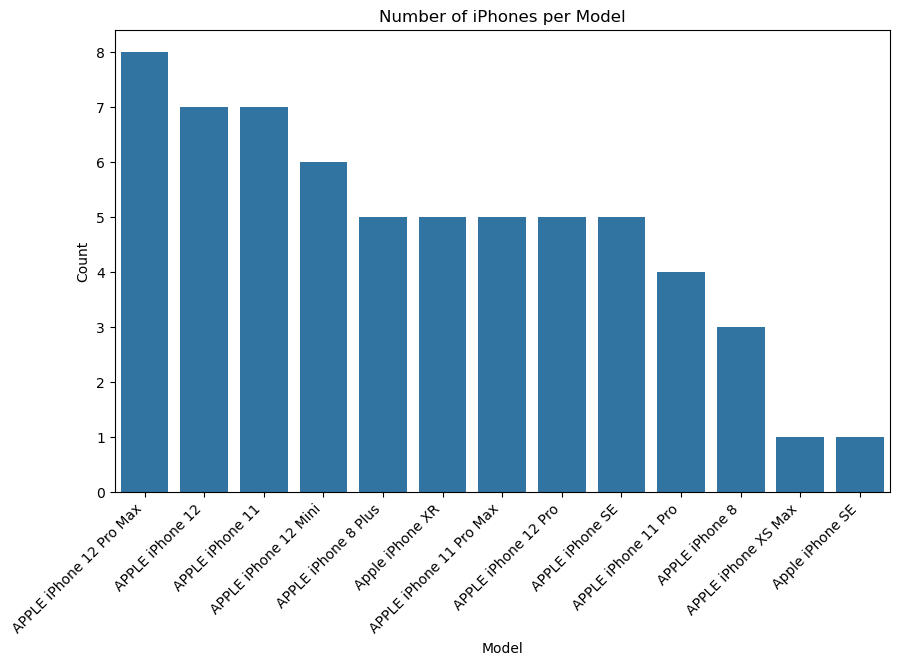

In [101]:
# Plotting the count of iPhones by Model
plt.figure(figsize=(10, 6))
sns.countplot(data=iphone_dataset, x='Model', order=iphone_dataset['Model'].value_counts().index)
plt.title('Number of iPhones per Model')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

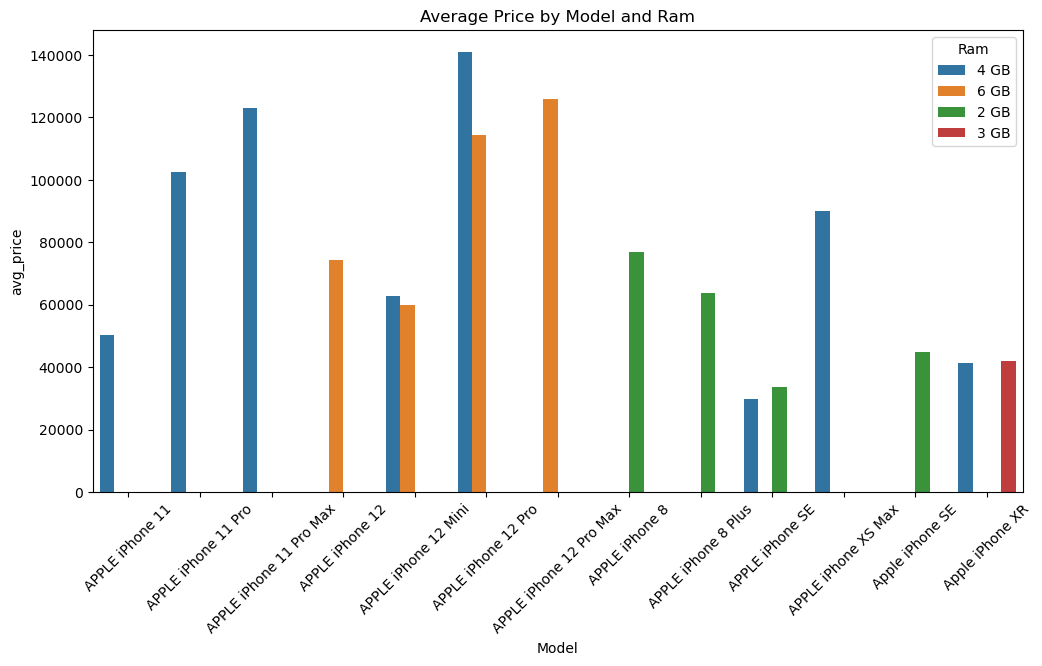

In [153]:
# Plotting average price by model and ram

plt.figure(figsize=(12, 6))
sns.barplot(data=model_stats.reset_index(), x='Model', y='avg_price', hue='Ram')
plt.title('Average Price by Model and Ram')
plt.xticks(rotation=45)
plt.show()

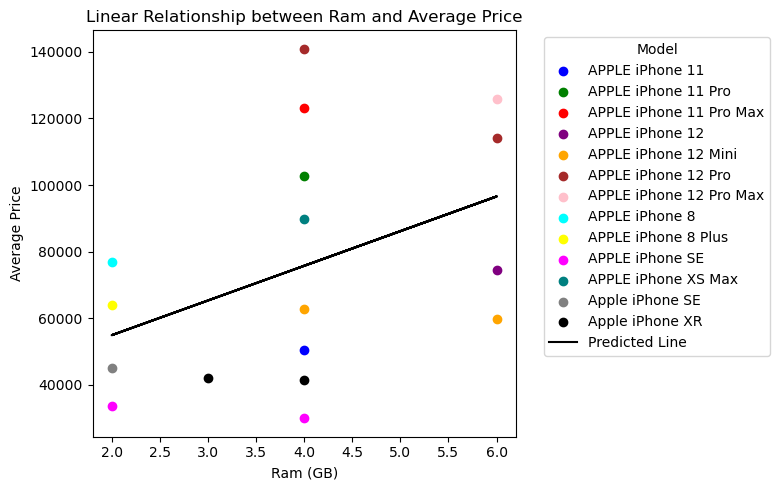

In [147]:
model_stats.to_csv(f'model_stats.csv')

model_ram_relationship = pd.read_csv(f'model_stats.csv')

display(model_ram_relationship.columns)

display(model_ram_relationship.head(10))

# Convert 'Ram' values from string to numeric (e.g., '4GB' to 4)
model_ram_relationship['Ram_numeric'] = model_ram_relationship['Ram'].apply(lambda x: int(x.replace(' GB', '').strip()))

# Prepare the data for linear regression
X = model_ram_relationship[['Ram_numeric']]  # Independent variable
y = model_ram_relationship['avg_price']  # Dependent variable

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicting values
predicted_avg_price = model.predict(X)

# Create a color map for 'Model'
model_colors = {
    'APPLE iPhone 11': 'blue', 
    'APPLE iPhone 11 Pro': 'green', 
    'APPLE iPhone 11 Pro Max': 'red', 
    'APPLE iPhone 12': 'purple',
    'APPLE iPhone 12 Mini': 'orange',
    'APPLE iPhone 12 Pro': 'brown',
    'APPLE iPhone 12 Pro Max': 'pink',
    'APPLE iPhone 8': 'cyan',
    'APPLE iPhone 8 Plus': 'yellow',
    'APPLE iPhone SE': 'magenta',
    'APPLE iPhone XS Max': 'teal',
    'Apple iPhone SE': 'gray',
    'Apple iPhone XR': 'black'
}

# Plot actual points colored by Model and sized by Number_Of_Ratings
plt.figure(figsize=(8, 5))

# Plot each model with specific colors and bubble sizes based on Number_Of_Ratings
for model_name in model_ram_relationship['Model'].unique():
    model_data = model_ram_relationship[model_ram_relationship['Model'] == model_name]
    plt.scatter(model_data['Ram_numeric'], model_data['avg_price'], 
                label=model_name, color=model_colors[model_name]) #,
                 # s=model_data['avg_number_of_ratings']*10, alpha=0.6)  # Bubble size based on Number_Of_Ratings

# Plot the predicted line
plt.plot(model_ram_relationship['Ram_numeric'], predicted_avg_price, color='black', label='Predicted Line')

# Labels and title
plt.xlabel('Ram (GB)')
plt.ylabel('Average Price')
plt.title('Linear Relationship between Ram and Average Price')

# Add legend for model colors
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

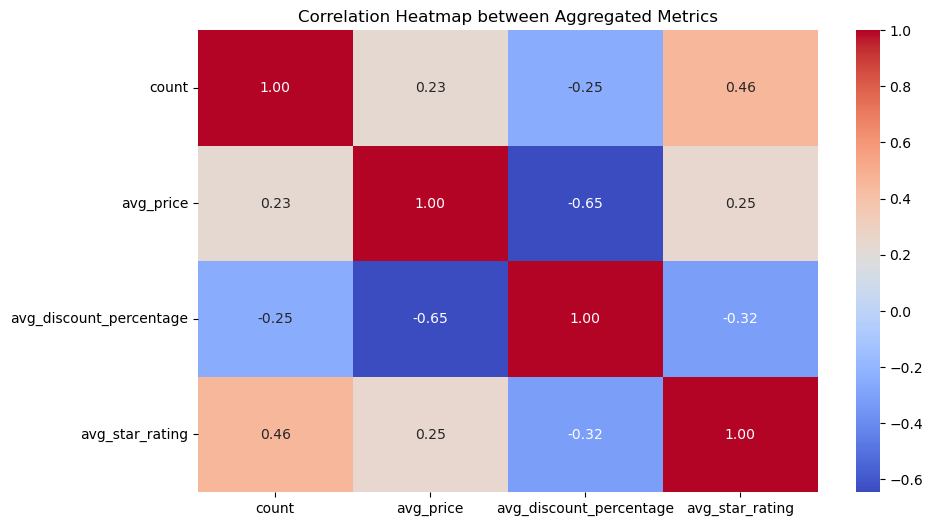

In [123]:

# Get correlation between the numeric columns
correlation = model_stats[['count', 'avg_price', 'avg_discount_percentage', 'avg_star_rating']].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Aggregated Metrics')
plt.show()

### <b> Extracting dataset to Parquet file </b>

In [28]:
## Extracting Modified_Dataset in Parquet file

iphone_dataset.to_parquet('apple_product_parquet.parquet', engine='pyarrow', index=None)  # or engine='fastparquet'

iphone_dataset.to_csv('apple_product_csv.csv', index=None)  # or engine='fastparquet'


In [29]:
# Reading parquet file

df_parquet = pd.read_parquet('apple_product_parquet.parquet', engine='pyarrow')  # or engine='fastparquet'

# Set the maximum number of rows displayed to None (which means no limit)
pd.set_option('display.max_rows', None)

# Print the DataFrame
display(df_parquet)

# Displaying all rows in Dataset
pd.reset_option('display.max_rows')


,Product_Name,Product_URL,Brand,Sale_Price,Mrp,Discount_Percentage,Number_Of_Ratings,Number_Of_Reviews,Upc,Star_Rating,Ram,Discounted_Price,Discounted_Amount,Model,Platform
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB,49900,0,APPLE iPhone 8 Plus,Flipkart
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB,84900,0,APPLE iPhone 8 Plus,Flipkart
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB,84900,0,APPLE iPhone 8 Plus,Flipkart
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB,77000,0,APPLE iPhone 8,Flipkart
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB,77000,0,APPLE iPhone 8,Flipkart
5,"APPLE iPhone 8 Plus (Silver, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,49900,49900,0,3431,356,MOBEXRGVQGYYP8FV,4.6,2 GB,49900,0,APPLE iPhone 8 Plus,Flipkart
6,"APPLE iPhone 8 Plus (Space Grey, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,49900,49900,0,3431,356,MOBEXRGVQKBREZP8,4.6,2 GB,49900,0,APPLE iPhone 8 Plus,Flipkart
7,"APPLE iPhone 8 (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-space-...,Apple,77000,77000,0,11202,794,MOBEXRGVZFZGZEWV,4.5,2 GB,77000,0,APPLE iPhone 8,Flipkart
8,"APPLE iPhone XS Max (Silver, 64 GB)",https://www.flipkart.com/apple-iphone-xs-max-s...,Apple,89900,89900,0,1454,149,MOBF944E2XAHW8V5,4.6,4 GB,89900,0,APPLE iPhone XS Max,Flipkart
9,"Apple iPhone XR ((PRODUCT)RED, 128 GB) (Includ...",https://www.flipkart.com/apple-iphone-xr-produ...,Apple,41999,52900,20,79512,6796,MOBF9Z7ZHQC23PWQ,4.6,4 GB,33599,8399,Apple iPhone XR,Flipkart
